# **Saumya Kothari - Introduction to Neural Networks & Deep Learning Project [Part 4]**

----------------------------------------------------------------------

## **Part 4 [solved in the other ipynb notebook]**

#### DOMAIN: 
##### Autonomous Vehicles

#### BUSINESS CONTEXT: 
- A Recognising multi-digit numbers in photographs captured at street level is an important component of modern-day map making. A classic example of a corpus of such street-level photographs is Google’s Street View imagery composed of hundreds of millions of geo-located 360-degree panoramic images.
- The ability to automatically transcribe an address number from a geo-located patch of pixels and associate the transcribed number with a known street address helps pinpoint, with a high degree of accuracy, the location of the building it represents. More broadly, recognising numbers in photographs is a problem of interest to the optical character recognition community.
- While OCR on constrained domains like document processing is well studied, arbitrary multi-character text recognition in photographs is still highly challenging. This difficulty arises due to the wide variability in the visual appearance of text in the wild on account of a large range of fonts, colours, styles, orientations, and character arrangements.
- The recognition problem is further complicated by environmental factors such as lighting, shadows, specularity, and occlusions as well as by image acquisition factors such as resolution, motion, and focus blurs. In this project, we will use the dataset with images centred around a single digit (many of the images do contain some distractors at the sides). Although we are taking a sample of the data which is simpler, it is more complex than MNIST because of the distractors.

#### DATA DESCRIPTION: 
The SVHN is a real-world image dataset for developing machine learning and object recognition algorithms with the minimal requirement on data formatting but comes from a significantly harder,
unsolved, real-world problem (recognising digits and numbers in natural scene images). SVHN is obtained from house numbers in Google Street View images. Where the labels for each of this image are the prominent number in that image i.e. 2,6,7 and 4 respectively.
The dataset has been provided in the form of h5py files. You can read about this file format here: http://docs.h5py.org/en/stable/high/dataset.html

Acknowledgement: Yuval Netzer, Tao Wang, Adam Coates, Alessandro Bissacco, Bo Wu, Andrew Y. Ng Reading
Digits in Natural Images with Unsupervised Feature Learning NIPS Workshop on Deep Learning and
Unsupervised Feature Learning 2011. PDF
http://ufldl.stanford.edu/housenumbers as the URL for this site when necessary

#### PROJECT OBJECTIVE: 
We will build a digit classifier on the SVHN (Street View Housing Number) dataset.
Steps and tasks: [ Total Score: 30 points]
1. Import the data.
2. Data pre-processing and visualisation.
3. Design, train, tune and test a neural network image classifier.
Hint: Use best approach to refine and tune the data or the model. Be highly experimental here to get the best accuracy out of the model.
4. Plot the training loss, validation loss vs number of epochs and training accuracy, validation accuracy vs number of
epochs plot and write your observations on the same.

In [1]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Setting the current working directory
import os; 
os.chdir('/content/drive/MyDrive/NeuralNetworks')

In [3]:
# Importing neccessary packages
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, h5py
import matplotlib.style as style; style.use('fivethirtyeight')
%matplotlib inline

# Metrics and preprocessing
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# TF and Keras
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers

# Checking if GPU is found
import tensorflow as tf
device_name = tf.test.gpu_device_name()

#tf.reset_default_graph()
#tf.set_random_seed(42)

In [4]:
!ls '/content/drive/MyDrive/NeuralNetworks'

'Part - 4 - Autonomous_Vehicles_SVHN_single_grey1.h5'


**Load train, validatin and test datasets from h5 file**

In [10]:
# Read the h5 file
h5_Vehicle = h5py.File('Part - 4 - Autonomous_Vehicles_SVHN_single_grey1.h5', 'r')

# Load the training, validation and test sets
X_train = h5_Vehicle['X_train'][:]
y_train = h5_Vehicle['y_train'][:]
X_val = h5_Vehicle['X_val'][:]
y_val = h5_Vehicle['y_val'][:]
X_test = h5_Vehicle['X_test'][:]
y_test = h5_Vehicle['y_test'][:]

# Close this file

h5_Vehicle.close()

print('Training set', X_train.shape, y_train.shape)
print('Validation set', X_val.shape, y_val.shape)
print('Test set', X_test.shape, y_test.shape)

print('\n')
print('Unique labels in y_train:', np.unique(y_train))
print('Unique labels in y_val:', np.unique(y_val))
print('Unique labels in y_test:', np.unique(y_test))

Training set (42000, 32, 32) (42000,)
Validation set (60000, 32, 32) (60000,)
Test set (18000, 32, 32) (18000,)


Unique labels in y_train: [0 1 2 3 4 5 6 7 8 9]
Unique labels in y_val: [0 1 2 3 4 5 6 7 8 9]
Unique labels in y_test: [0 1 2 3 4 5 6 7 8 9]


**Observation:**
Length of training sets: 42k, validation sets: 60k, test sets: 18k

*   Length of training sets: 42000, validation sets: 60000, test sets: 18000
*   Size of the images: 32*32
*   Number of class: 10

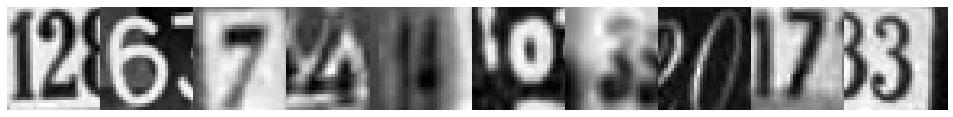

Label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [14]:
# Visualizing first 10 images in the dataset and their labels
plt.figure(figsize = (15, 5))
for i in range(10):  
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i].reshape((32, 32)),cmap = plt.cm.binary)
    plt.axis('off')
plt.subplots_adjust(wspace = -0.1, hspace = -0.1)
plt.show()

print('Label for each of the above image: %s' % (y_train[0 : 10]))

Checking first image and label in training set: 
------------------------------------------------------------


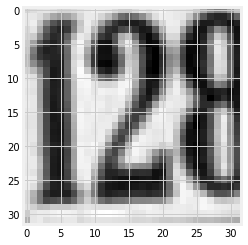

Label: 2


In [15]:
print('Checking first image and label in training set: '); print('---'*20)
plt.imshow(X_train[0], cmap = plt.cm.binary)    
plt.show()
print('Label:', y_train[0])

Checking first image and label in validation set:
------------------------------------------------------------


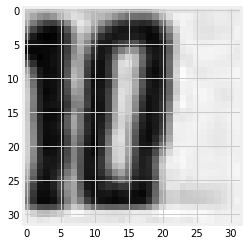

Label: 0


In [17]:
print('Checking first image and label in validation set:'); print('---'*20)
plt.imshow(X_val[0], cmap = plt.cm.binary)    
plt.show()
print('Label:', y_val[0])

Checking first image and label in test set:
------------------------------------------------------------


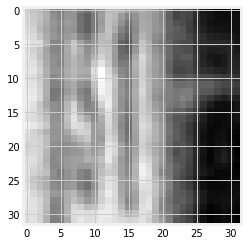

Label: 1


In [19]:
print('Checking first image and label in test set:'); print('---'*20)
plt.imshow(X_test[0], cmap = plt.cm.binary)    
plt.show()
print('Label:', y_test[0])

**Flatten and normalize the images for Keras**

In [22]:
# Reshaping the data to make it into two dimensions
print('Reshaping X data: From (n, 32, 32) to (n, 1024)'); print('----'*20)
X_train = X_train.reshape((X_train.shape[0], -1))
X_val = X_val.reshape((X_val.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))

#Changing the datatype
print('Making sure that the values are float so that we can get decimal points after division'); print('----'*20)
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_test = X_test.astype('float32')

print('Normalizing the RGB codes by dividing it to the max RGB value'); print('----'*20)
X_train /= 255
X_val /= 255
X_test /= 255

print('Converting y data into categorical (one-hot encoding)'); print('----'*20)
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

Reshaping X data: From (n, 32, 32) to (n, 1024)
--------------------------------------------------------------------------------
Making sure that the values are float so that we can get decimal points after division
--------------------------------------------------------------------------------
Normalizing the RGB codes by dividing it to the max RGB value
--------------------------------------------------------------------------------
Converting y data into categorical (one-hot encoding)
--------------------------------------------------------------------------------


In [23]:
#Printing SHAPE
print('X_train shape:', X_train.shape)
print('X_val shape:', X_val.shape)
print('X_test shape:', X_test.shape)

print('\n')

print('y_train shape:', y_train.shape)
print('y_val shape:', y_val.shape)
print('y_test shape:', y_test.shape)

print('\n')

print('Number of images in X_train', X_train.shape[0])
print('Number of images in X_val', X_val.shape[0])
print('Number of images in X_test', X_test.shape[0])

X_train shape: (42000, 1024)
X_val shape: (60000, 1024)
X_test shape: (18000, 1024)


y_train shape: (42000, 10, 2, 2)
y_val shape: (60000, 10, 2, 2)
y_test shape: (18000, 10, 2, 2)


Number of images in X_train 42000
Number of images in X_val 60000
Number of images in X_test 18000


### **Modelling - Baby sitting the learning process**

**Fully connected linear layer**

In [24]:

class Linear():
    def __init__(self, in_size, out_size):
        self.W = np.random.randn(in_size, out_size) * 0.01
        self.b = np.zeros((1, out_size))
        self.params = [self.W, self.b]
        self.gradW = None
        self.gradB = None
        self.gradInput = None        

    def forward(self, X):
        self.X = X
        self.output = np.dot(X, self.W) + self.b
        return self.output

    def backward(self, nextgrad):
        self.gradW = np.dot(self.X.T, nextgrad)
        self.gradB = np.sum(nextgrad, axis=0)
        self.gradInput = np.dot(nextgrad, self.W.T)
        return self.gradInput, [self.gradW, self.gradB]

**ReLU**

In [25]:
class ReLU():
    def __init__(self):
        self.params = []
        self.gradInput = None

    def forward(self, X):
        self.output = np.maximum(X, 0)
        return self.output

    def backward(self, nextgrad):
        self.gradInput = nextgrad.copy()
        self.gradInput[self.output <=0] = 0
        return self.gradInput, []

**Softmax function**

In [26]:
def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

**Cross entropy loss**

In [27]:
class CrossEntropy:
    def forward(self, X, y):
        self.m = y.shape[0]
        self.p = softmax(X)
        cross_entropy = -np.log(self.p[range(self.m), y]+1e-16)
        loss = np.sum(cross_entropy) / self.m
        return loss
    
    def backward(self, X, y):
        y_idx = y.argmax()        
        grad = softmax(X)
        grad[range(self.m), y] -= 1
        grad /= self.m
        return grad

**NN class that enables the forward prop and backward propagation of the entire network**

In [28]:
class NN():
    def __init__(self, lossfunc = CrossEntropy(), mode = 'train'):
        self.params = []
        self.layers = []
        self.loss_func = lossfunc
        self.grads = []
        self.mode = mode
        
    def add_layer(self, layer):
        self.layers.append(layer)
        self.params.append(layer.params)

    def forward(self, X):
        for layer in self.layers:
            X = layer.forward(X)
        return X
    
    def backward(self, nextgrad):
        self.clear_grad_param()
        for layer in reversed(self.layers):
            nextgrad, grad = layer.backward(nextgrad)
            self.grads.append(grad)
        return self.grads
    
    def train_step(self, X, y):
        out = self.forward(X)
        loss = self.loss_func.forward(out,y)
        nextgrad = self.loss_func.backward(out,y)
        grads = self.backward(nextgrad)
        return loss, grads
    
    def predict(self, X):
        X = self.forward(X)
        p = softmax(X)
        return np.argmax(p, axis=1)
    
    def predict_scores(self, X):
        X = self.forward(X)
        p = softmax(X)
        return p
    
    def clear_grad_param(self):
        self.grads = []

**Update SGD function with momentum**

In [29]:
def update(velocity, params, grads, learning_rate=0.01, mu=0.9):
    for v, p, g, in zip(velocity, params, reversed(grads)):
        for i in range(len(g)):
            v[i] = (mu * v[i]) - (learning_rate * g[i])
            p[i] += v[i]

**Getting minibatches**

In [30]:
def minibatch(X, y, minibatch_size):
    n = X.shape[0]
    minibatches = []
    permutation = np.random.permutation(X.shape[0])
    X = X[permutation]
    y = y[permutation]
    
    for i in range(0, n , minibatch_size):
        X_batch = X[i:i + minibatch_size, :]
        y_batch = y[i:i + minibatch_size, ]
        minibatches.append((X_batch, y_batch))
        
    return minibatches

**The Training:**

In [31]:
def train(net, X_train, y_train, minibatch_size, epoch, learning_rate, mu = 0.9, X_val = None, y_val = None, Lambda = 0, verb = True):
    validationSet_loss_epochs = []
    minibatches = minibatch(X_train, y_train, minibatch_size)
    minibatches_val = minibatch(X_val, y_val, minibatch_size)
    
    for i in range(epoch):
        loss_batch = []
        val_loss_batch = []
        velocity = []
        for param_layer in net.params:
            p = [np.zeros_like(param) for param in list(param_layer)]
            velocity.append(p)
            
        # iterate over mini batches
        for X_mini, y_mini in minibatches:
            loss, grads = net.train_step(X_mini, y_mini)
            loss_batch.append(loss)
            update(velocity, net.params, grads, learning_rate=learning_rate, mu=mu)

        for X_mini_val, y_mini_val in minibatches_val:
            val_loss, _ = net.train_step(X_mini, y_mini)
            val_loss_batch.append(val_loss)
        
        # accuracy of model at end of epoch after all mini batch updates
        m_train = X_train.shape[0]
        m_val = X_val.shape[0]
        y_train_pred = []
        y_val_pred = []
        y_train1 = []
        y_vall = []
        for j in range(0, m_train, minibatch_size):
            X_tr = X_train[j:j + minibatch_size, : ]
            y_tr = y_train[j:j + minibatch_size,]
            y_train1 = np.append(y_train1, y_tr)
            y_train_pred = np.append(y_train_pred, net.predict(X_tr))

        for j in range(0, m_val, minibatch_size):
            X_va = X_val[j:j + minibatch_size, : ]
            y_va = y_val[j:j + minibatch_size,]
            y_vall = np.append(y_vall, y_va)
            y_val_pred = np.append(y_val_pred, net.predict(X_va))
            
        train_acc = check_accuracy(y_train1, y_train_pred)
        val_acc = check_accuracy(y_vall, y_val_pred)
        
        ## weights
        w = np.array(net.params[0][0])
        
        ## adding regularization to cost
        mean_train_loss = (sum(loss_batch) / float(len(loss_batch)))
        mean_val_loss = sum(val_loss_batch) / float(len(val_loss_batch))
        
        validationSet_loss_epochs.append(mean_val_loss)
        if verb:
            if i%50==0:
                print("Epoch {3}/{4}: Loss = {0} | Training Accuracy = {1}".format(mean_train_loss, train_acc, val_acc, i, epoch))
    return net, val_acc

**Checking the accuracy of the model**

In [32]:
def check_accuracy(y_true, y_pred):
    return np.mean(y_pred == y_true)

**Invoking created functions**

In [33]:
# Invoking the model
## input size
input_dim = X_train.shape[1]

def train_and_test_loop(iterations, lr, Lambda, verb = True):
    ## hyperparameters
    iterations = iterations
    learning_rate = lr
    hidden_nodes1 = 10
    output_nodes = 10

    ## define neural net
    nn = NN()
    nn.add_layer(Linear(input_dim, hidden_nodes1))

    nn, val_acc = train(nn, X_train, y_train_o, minibatch_size = 200, epoch = iterations, learning_rate = learning_rate,\
                      X_val = X_test, y_val = y_test_o, Lambda = Lambda, verb = verb)
    return val_acc

In [34]:
# Disable the regaularization after checking loss
lr = 0.00001
Lambda = 0
train_and_test_loop(1, lr, Lambda)

Epoch 0/1: Loss = 2.302585283088422 | Training Accuracy = 0.10192857142857142


0.0955

**Increase Lambda(Regularization) and check what it does to our loss function**

In [38]:
lr = 0.00001
Lambda = 1e4
train_and_test_loop(1, lr, Lambda)

Epoch 0/1: Loss = 2.3025852165243452 | Training Accuracy = 0.10192857142857142


0.0955

In [41]:
# Overfitting to a small subset of our dataset (in this case 20 images)

X_train_subset = X_train[0:20]
y_train_subset = y_train[0:20]

X_train = X_train_subset
y_train = y_train_subset

X_train.shape, y_train.shape

((20, 1024), (20, 10, 2, 2))

**Making sure that we overfit very small portion of the training data**

So, set a small learning rate and turn regularization off In the code below:

*   Take the first 20 examples
*   turn off regularization(reg=0.0)
*   use simple vanilla 'sgd'

In [42]:
%time
lr = 0.001
Lambda = 0
train_and_test_loop(5000, lr, Lambda)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.96 µs
Epoch 0/5000: Loss = 2.302585560613877 | Training Accuracy = 0.25
Epoch 50/5000: Loss = 2.2993515989242357 | Training Accuracy = 0.25
Epoch 100/5000: Loss = 2.2961498719261715 | Training Accuracy = 0.25
Epoch 150/5000: Loss = 2.2929801119822977 | Training Accuracy = 0.25
Epoch 200/5000: Loss = 2.2898420522393947 | Training Accuracy = 0.25
Epoch 250/5000: Loss = 2.2867354266485527 | Training Accuracy = 0.25
Epoch 300/5000: Loss = 2.283659969985244 | Training Accuracy = 0.25
Epoch 350/5000: Loss = 2.280615417869293 | Training Accuracy = 0.25
Epoch 400/5000: Loss = 2.277601506784756 | Training Accuracy = 0.25
Epoch 450/5000: Loss = 2.2746179740996704 | Training Accuracy = 0.25
Epoch 500/5000: Loss = 2.271664558085676 | Training Accuracy = 0.25
Epoch 550/5000: Loss = 2.2687409979374964 | Training Accuracy = 0.25
Epoch 600/5000: Loss = 2.2658470337922565 | Training Accuracy = 0.25
Epoch 650/5000: Loss = 2.2629824067486353 | Tra

0.10077777777777777

**Loading the original dataset again**

In [44]:
# Read the h5 file
h5_Vehicle = h5py.File('Part - 4 - Autonomous_Vehicles_SVHN_single_grey1.h5', 'r')

# Load the training, validation and test sets
X_train = h5_Vehicle['X_train'][:]
y_train_o = h5_Vehicle['y_train'][:]
X_val = h5_Vehicle['X_val'][:]
y_val_o = h5_Vehicle['y_val'][:]
X_test = h5_Vehicle['X_test'][:]
y_test_o = h5_Vehicle['y_test'][:]

print('Reshaping X data: (n, 32, 32) => (n, 1024)'); print('--'*40)
X_train = X_train.reshape((X_train.shape[0], -1))
X_val = X_val.reshape((X_val.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))

print('Making sure that the values are float so that we can get decimal points after division'); print('--'*40)
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_test = X_test.astype('float32')

print('Normalizing the RGB codes by dividing it to the max RGB value'); print('--'*40)
X_train /= 255
X_val /= 255
X_test /= 255

print('Converting y data into categorical (one-hot encoding)'); print('--'*40)
y_train = to_categorical(y_train_o)
y_val = to_categorical(y_val_o)
y_test = to_categorical(y_test_o)

Reshaping X data: (n, 32, 32) => (n, 1024)
--------------------------------------------------------------------------------
Making sure that the values are float so that we can get decimal points after division
--------------------------------------------------------------------------------
Normalizing the RGB codes by dividing it to the max RGB value
--------------------------------------------------------------------------------
Converting y data into categorical (one-hot encoding)
--------------------------------------------------------------------------------


**Start with small regularization and find learning rate that makes the loss go down.**

In [45]:
lr = 1e-7
Lambda = 1e-7
train_and_test_loop(500, lr, Lambda)

Epoch 0/500: Loss = 2.3100252019112637 | Training Accuracy = 0.10245238095238095
Epoch 50/500: Loss = 2.3075806310263567 | Training Accuracy = 0.10207142857142858
Epoch 100/500: Loss = 2.306031700087846 | Training Accuracy = 0.1015
Epoch 150/500: Loss = 2.305042411579897 | Training Accuracy = 0.10019047619047619
Epoch 200/500: Loss = 2.3044056325756435 | Training Accuracy = 0.09988095238095238
Epoch 250/500: Loss = 2.3039921173807456 | Training Accuracy = 0.09854761904761905
Epoch 300/500: Loss = 2.3037205595440673 | Training Accuracy = 0.09671428571428571
Epoch 350/500: Loss = 2.303539522404581 | Training Accuracy = 0.09511904761904762
Epoch 400/500: Loss = 2.3034163366739833 | Training Accuracy = 0.09416666666666666
Epoch 450/500: Loss = 2.3033301932319805 | Training Accuracy = 0.09264285714285714


0.08572222222222223

In [46]:
# Changing learning rate to 1e-3

lr = 0.001
Lambda = 1e-7
train_and_test_loop(500, lr, Lambda)

Epoch 0/500: Loss = 2.3054600951507305 | Training Accuracy = 0.11395238095238096
Epoch 50/500: Loss = 2.259522161398282 | Training Accuracy = 0.19652380952380952
Epoch 100/500: Loss = 2.2509994247963587 | Training Accuracy = 0.20873809523809525
Epoch 150/500: Loss = 2.2466623930996477 | Training Accuracy = 0.2149047619047619
Epoch 200/500: Loss = 2.2437567193893795 | Training Accuracy = 0.21921428571428572
Epoch 250/500: Loss = 2.2415719552403033 | Training Accuracy = 0.22171428571428572
Epoch 300/500: Loss = 2.2398229369841203 | Training Accuracy = 0.2241904761904762
Epoch 350/500: Loss = 2.2383653065434563 | Training Accuracy = 0.22564285714285715
Epoch 400/500: Loss = 2.237115482633667 | Training Accuracy = 0.22628571428571428
Epoch 450/500: Loss = 2.236020749372444 | Training Accuracy = 0.22785714285714287


0.21066666666666667

**Optimizing hyperparameter and running a deeper search**

In [47]:
import math
for i in range(1, 10):
    lr = math.pow(10, np.random.uniform(-3.0, -2.0))
    Lambda = math.pow(10, np.random.uniform(-5, 2))
    best_acc = train_and_test_loop(100, lr, Lambda, False)
    print("Try {0}/{1}: Best_val_acc: {2}, lr: {3}, Lambda: {4}\n".format(i, 10, best_acc, lr, Lambda))

Try 1/10: Best_val_acc: 0.183, lr: 0.006194881356749269, Lambda: 3.0674849905942456e-05

Try 2/10: Best_val_acc: 0.204, lr: 0.005446364406380019, Lambda: 51.87240826024816

Try 3/10: Best_val_acc: 0.2088888888888889, lr: 0.0016522382707245898, Lambda: 0.1939116277632319

Try 4/10: Best_val_acc: 0.19822222222222222, lr: 0.0017057627561567893, Lambda: 2.518863723902807

Try 5/10: Best_val_acc: 0.19066666666666668, lr: 0.005152224038963205, Lambda: 1.2143041794020415e-05

Try 6/10: Best_val_acc: 0.20827777777777778, lr: 0.00921935228718037, Lambda: 0.0004350800957907299

Try 7/10: Best_val_acc: 0.18577777777777776, lr: 0.00878261288169845, Lambda: 0.0035111612834760712

Try 8/10: Best_val_acc: 0.19533333333333333, lr: 0.006090543136815944, Lambda: 13.609433466281665

Try 9/10: Best_val_acc: 0.18994444444444444, lr: 0.007509709326301158, Lambda: 2.3352940673188255e-05



**Observation:**

Best accuracy achieved using this method after hyperparameter optimization: ~21%

## **Modelling - Neural Network**

**NN model, Sigmoid activation functions, SGD optimizer**

In [48]:
print('NN model with sigmoid activations'); print('----'*20)
# Initialize the neural network classifier
model = Sequential()

# Input Layer - adding input layer and activation functions sigmoid
model.add(Dense(128, input_shape = (1024, )))
# Adding activation function
model.add(Activation('sigmoid'))

#Hidden Layer 1 - adding first hidden layer
model.add(Dense(64))
# Adding activation function
model.add(Activation('sigmoid'))

# Output Layer - adding output layer which is of 10 nodes (digits)
model.add(Dense(10))
# Adding activation function - softmax for multiclass classification
model.add(Activation('softmax'))

NN model with sigmoid activations
--------------------------------------------------------------------------------


In [49]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               131200    
_________________________________________________________________
activation (Activation)      (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
activation_1 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
Total params: 140,106
Trainable params: 140,106
Non-trainable params: 0
__________________________________________________

In [51]:
# compiling the neural network classifier, sgd optimizer
sgd = optimizers.SGD(lr = 0.01)
model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Fitting the neural network for training
history = model.fit(X_train, y_train, validation_data = (X_val, y_val), batch_size = 200, epochs = 100, verbose = 1)

Epoch 1/100
210/210 [==============================] - 3s 12ms/step - loss: 2.3747 - accuracy: 0.1006 - val_loss: 2.3027 - val_accuracy: 0.1032
Epoch 2/100
210/210 [==============================] - 2s 10ms/step - loss: 2.3030 - accuracy: 0.1005 - val_loss: 2.3028 - val_accuracy: 0.1006
Epoch 3/100
210/210 [==============================] - 2s 10ms/step - loss: 2.3030 - accuracy: 0.1003 - val_loss: 2.3028 - val_accuracy: 0.1019
Epoch 4/100
210/210 [==============================] - 2s 10ms/step - loss: 2.3029 - accuracy: 0.0995 - val_loss: 2.3026 - val_accuracy: 0.1011
Epoch 5/100
210/210 [==============================] - 2s 10ms/step - loss: 2.3028 - accuracy: 0.1025 - val_loss: 2.3027 - val_accuracy: 0.0993
Epoch 6/100
210/210 [==============================] - 2s 10ms/step - loss: 2.3028 - accuracy: 0.0998 - val_loss: 2.3025 - val_accuracy: 0.1060
Epoch 7/100
210/210 [==============================] - 2s 9ms/step - loss: 2.3027 - accuracy: 0.1037 - val_loss: 2.3025 - val_accuracy: 

In [52]:
print('Evaluate NN model with sigmoid activations'); print('----'*20)
results1 = model.evaluate(X_val, y_val)
print('Validation accuracy: {}'.format(round(results1[1]*100, 2), '%'))

Evaluate NN model with sigmoid activations
--------------------------------------------------------------------------------
1875/1875 [==============================] - 4s 2ms/step - loss: 2.2991 - accuracy: 0.1480
Validation accuracy: 14.8


**NN model, Sigmoid activation functions, SGD optimizer: Changing Learning Rate**

In [53]:
print('NN model with sigmoid activations - changing learning rate'); print('----'*20)
# compiling the neural network classifier, sgd optimizer
sgd = optimizers.SGD(lr = 0.001)
model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Fitting the neural network for training
history = model.fit(X_train, y_train, validation_data = (X_val, y_val), batch_size = 200, epochs = 100, verbose = 1)

NN model with sigmoid activations - changing learning rate
--------------------------------------------------------------------------------
Epoch 1/100
210/210 [==============================] - 3s 11ms/step - loss: 2.2990 - accuracy: 0.1490 - val_loss: 2.2991 - val_accuracy: 0.1528
Epoch 2/100
210/210 [==============================] - 2s 10ms/step - loss: 2.2988 - accuracy: 0.1517 - val_loss: 2.2991 - val_accuracy: 0.1496
Epoch 3/100
210/210 [==============================] - 2s 10ms/step - loss: 2.2990 - accuracy: 0.1443 - val_loss: 2.2990 - val_accuracy: 0.1476
Epoch 4/100
210/210 [==============================] - 2s 10ms/step - loss: 2.2989 - accuracy: 0.1463 - val_loss: 2.2990 - val_accuracy: 0.1460
Epoch 5/100
210/210 [==============================] - 2s 10ms/step - loss: 2.2986 - accuracy: 0.1481 - val_loss: 2.2990 - val_accuracy: 0.1455
Epoch 6/100
210/210 [==============================] - 2s 10ms/step - loss: 2.2990 - accuracy: 0.1476 - val_loss: 2.2990 - val_accuracy: 0.1

In [54]:
print('Evaluate NN model with sigmoid activations - changing learning rate'); print('--'*40)
results1 = model.evaluate(X_val, y_val)
print('Validation accuracy: {}'.format(round(results1[1]*100, 2), '%'))

Evaluate NN model with sigmoid activations - changing learning rate
--------------------------------------------------------------------------------
1875/1875 [==============================] - 4s 2ms/step - loss: 2.2987 - accuracy: 0.1445
Validation accuracy: 14.45


**Observation:**

*   Validation score is very low, changing learning rate further reduces it.
*   Optimizing the network in order to better learn the patterns in the dataset.
*   Best model out of the above is the one with lower learning rate using SGD optimizer and sigmoid activations.

Let's use ReLU activations and see if the score improves.

In [55]:
%time
print('NN model with relu activations and sgd optimizers'); print('--'*40)
# Initialize the neural network classifier
model2 = Sequential()

# Input Layer - adding input layer and activation functions relu
model2.add(Dense(128, input_shape = (1024, )))
# Adding activation function
model2.add(Activation('relu'))

#Hidden Layer 1 - adding first hidden layer
model2.add(Dense(64))
# Adding activation function
model2.add(Activation('relu'))

# Output Layer - adding output layer which is of 10 nodes (digits)
model2.add(Dense(10))
# Adding activation function - softmax for multiclass classification
model2.add(Activation('softmax'))

CPU times: user 2 µs, sys: 2 µs, total: 4 µs
Wall time: 6.91 µs
NN model with relu activations and sgd optimizers
--------------------------------------------------------------------------------


In [56]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 128)               131200    
_________________________________________________________________
activation_3 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
activation_4 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                650       
_________________________________________________________________
activation_5 (Activation)    (None, 10)                0         
Total params: 140,106
Trainable params: 140,106
Non-trainable params: 0
________________________________________________

In [57]:
# compiling the neural network classifier, sgd optimizer
sgd = optimizers.SGD(lr = 0.01)
model2.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Fitting the neural network for training
history = model2.fit(X_train, y_train, validation_data = (X_val, y_val), batch_size = 200, epochs = 100, verbose = 1)

Epoch 1/100
210/210 [==============================] - 3s 11ms/step - loss: 2.3087 - accuracy: 0.1109 - val_loss: 2.2927 - val_accuracy: 0.1367
Epoch 2/100
210/210 [==============================] - 2s 10ms/step - loss: 2.2904 - accuracy: 0.1413 - val_loss: 2.2816 - val_accuracy: 0.1444
Epoch 3/100
210/210 [==============================] - 2s 11ms/step - loss: 2.2793 - accuracy: 0.1625 - val_loss: 2.2703 - val_accuracy: 0.1745
Epoch 4/100
210/210 [==============================] - 2s 10ms/step - loss: 2.2673 - accuracy: 0.1877 - val_loss: 2.2549 - val_accuracy: 0.2130
Epoch 5/100
210/210 [==============================] - 2s 11ms/step - loss: 2.2507 - accuracy: 0.2151 - val_loss: 2.2376 - val_accuracy: 0.2480
Epoch 6/100
210/210 [==============================] - 2s 10ms/step - loss: 2.2340 - accuracy: 0.2443 - val_loss: 2.2171 - val_accuracy: 0.2613
Epoch 7/100
210/210 [==============================] - 2s 10ms/step - loss: 2.2107 - accuracy: 0.2687 - val_loss: 2.1904 - val_accuracy:

In [58]:
print('Evaluate NN model with relu activations'); print('--'*40)
results2 = model2.evaluate(X_val, y_val)
print('Validation accuracy: {}'.format(round(results2[1]*100, 2), '%'))

Evaluate NN model with relu activations
--------------------------------------------------------------------------------
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7518 - accuracy: 0.7784
Validation accuracy: 77.84


**NN model, ReLU activations, SGD optimizer: Changing Learning Rate**

In [59]:
%time
print('NN model with relu activations and sgd optimizers - changing learning rate'); print('--'*40)
# compiling the neural network classifier, sgd optimizer
sgd = optimizers.SGD(lr = 0.001)
model2.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Fitting the neural network for training
history = model2.fit(X_train, y_train, validation_data = (X_val, y_val), batch_size = 200, epochs = 100, verbose = 1)

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 10.3 µs
NN model with relu activations and sgd optimizers - changing learning rate
--------------------------------------------------------------------------------
Epoch 1/100
210/210 [==============================] - 3s 11ms/step - loss: 0.6992 - accuracy: 0.7966 - val_loss: 0.7166 - val_accuracy: 0.7931
Epoch 2/100
210/210 [==============================] - 2s 10ms/step - loss: 0.6903 - accuracy: 0.8008 - val_loss: 0.7162 - val_accuracy: 0.7931
Epoch 3/100
210/210 [==============================] - 2s 10ms/step - loss: 0.6970 - accuracy: 0.7976 - val_loss: 0.7156 - val_accuracy: 0.7937
Epoch 4/100
210/210 [==============================] - 2s 10ms/step - loss: 0.6938 - accuracy: 0.8003 - val_loss: 0.7150 - val_accuracy: 0.7934
Epoch 5/100
210/210 [==============================] - 2s 10ms/step - loss: 0.7019 - accuracy: 0.7970 - val_loss: 0.7152 - val_accuracy: 0.7935
Epoch 6/100
210/210 [==============================] - 2

In [60]:
print('Evaluate NN model with relu activations'); print('--'*40)
results2 = model2.evaluate(X_val, y_val)
print('Validation accuracy: {}'.format(round(results2[1]*100, 2), '%'))

Evaluate NN model with relu activations
--------------------------------------------------------------------------------
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6889 - accuracy: 0.8011
Validation accuracy: 80.11


**NN model, ReLU activations, Adam optimizer**

In [61]:
%time
print('NN model with relu activations and adam optimizer'); print('--'*40)
# compiling the neural network classifier, adam optimizer
adam = optimizers.Adam(lr = 0.01)
model2.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Fitting the neural network for training
history = model2.fit(X_train, y_train, validation_data = (X_val, y_val), batch_size = 200, epochs = 100, verbose = 1)

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.87 µs
NN model with relu activations and adam optimizer
--------------------------------------------------------------------------------
Epoch 1/100
210/210 [==============================] - 3s 11ms/step - loss: 6.6549 - accuracy: 0.1595 - val_loss: 1.9363 - val_accuracy: 0.2973
Epoch 2/100
210/210 [==============================] - 2s 10ms/step - loss: 1.8963 - accuracy: 0.3120 - val_loss: 1.6418 - val_accuracy: 0.4301
Epoch 3/100
210/210 [==============================] - 2s 10ms/step - loss: 1.4858 - accuracy: 0.5075 - val_loss: 1.1934 - val_accuracy: 0.6210
Epoch 4/100
210/210 [==============================] - 2s 11ms/step - loss: 1.2725 - accuracy: 0.5885 - val_loss: 1.2380 - val_accuracy: 0.6027
Epoch 5/100
210/210 [==============================] - 2s 10ms/step - loss: 1.2166 - accuracy: 0.6081 - val_loss: 1.1509 - val_accuracy: 0.6299
Epoch 6/100
210/210 [==============================] - 2s 10ms/step - loss: 1.146

In [62]:
print('Evaluate NN model with relu activations'); print('--'*40)
results2 = model2.evaluate(X_val, y_val)
print('Validation accuracy: {}'.format(round(results2[1]*100, 2), '%'))

Evaluate NN model with relu activations
--------------------------------------------------------------------------------
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7597 - accuracy: 0.7688
Validation accuracy: 76.88


**NN model, ReLU activations, Adam optimizer: Changing Learning Rate**

In [63]:
%time
print('NN model with relu activations and adam optimizer'); print('--'*40)
# compiling the neural network classifier, adam optimizer
adam = optimizers.Adam(lr = 0.001)
model2.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Fitting the neural network for training
history = model2.fit(X_train, y_train, validation_data = (X_val, y_val), batch_size = 200, epochs = 100, verbose = 1)

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 10.5 µs
NN model with relu activations and adam optimizer
--------------------------------------------------------------------------------
Epoch 1/100
210/210 [==============================] - 3s 11ms/step - loss: 0.6387 - accuracy: 0.8050 - val_loss: 0.6610 - val_accuracy: 0.8040
Epoch 2/100
210/210 [==============================] - 2s 10ms/step - loss: 0.6147 - accuracy: 0.8140 - val_loss: 0.6486 - val_accuracy: 0.8076
Epoch 3/100
210/210 [==============================] - 2s 10ms/step - loss: 0.6124 - accuracy: 0.8142 - val_loss: 0.6552 - val_accuracy: 0.8055
Epoch 4/100
210/210 [==============================] - 2s 10ms/step - loss: 0.6152 - accuracy: 0.8120 - val_loss: 0.6450 - val_accuracy: 0.8094
Epoch 5/100
210/210 [==============================] - 2s 10ms/step - loss: 0.6041 - accuracy: 0.8157 - val_loss: 0.6459 - val_accuracy: 0.8090
Epoch 6/100
210/210 [==============================] - 2s 10ms/step - loss: 0.6030 - 

In [64]:
print('Evaluate NN model with relu activations'); print('--'*40)
results2 = model2.evaluate(X_val, y_val)
print('Validation accuracy: {}'.format(round(results2[1]*100, 2), '%'))

Evaluate NN model with relu activations
--------------------------------------------------------------------------------
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6320 - accuracy: 0.8142
Validation accuracy: 81.42


**Observation:**

*   Improves the accuracy score considerably
*   Best accuracy achieved till now is using relu activations, SGD optimizer, changing learning rate to 0.001.

Let's try and change the number of activators and see if the score improves.



### **NN model, ReLU activations, Changing Number of Activators, SGD optimizers**



In [65]:
print('NN model with relu activations and changing number of activators'); print('--'*40)
# Initialize the neural network classifier
model3 = Sequential()

# Input Layer - adding input layer and activation functions relu
model3.add(Dense(256, input_shape = (1024, )))
# Adding activation function
model3.add(Activation('relu'))

#Hidden Layer 1 - adding first hidden layer
model3.add(Dense(128))
# Adding activation function
model3.add(Activation('relu'))

#Hidden Layer 2 - Adding second hidden layer
model3.add(Dense(64))
# Adding activation function
model3.add(Activation('relu'))

# Output Layer - adding output layer which is of 10 nodes (digits)
model3.add(Dense(10))
# Adding activation function - softmax for multiclass classification
model3.add(Activation('softmax'))

NN model with relu activations and changing number of activators
--------------------------------------------------------------------------------


In [66]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 256)               262400    
_________________________________________________________________
activation_6 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
activation_7 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)                8256      
_________________________________________________________________
activation_8 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)               

In [67]:
# compiling the neural network classifier, sgd optimizer
sgd = optimizers.SGD(lr = 0.01)
model3.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Fitting the neural network for training
history = model3.fit(X_train, y_train, validation_data = (X_val, y_val), batch_size = 200, epochs = 100, verbose = 1)

Epoch 1/100
210/210 [==============================] - 4s 18ms/step - loss: 2.3066 - accuracy: 0.1046 - val_loss: 2.2892 - val_accuracy: 0.1432
Epoch 2/100
210/210 [==============================] - 3s 16ms/step - loss: 2.2862 - accuracy: 0.1448 - val_loss: 2.2770 - val_accuracy: 0.1590
Epoch 3/100
210/210 [==============================] - 3s 16ms/step - loss: 2.2739 - accuracy: 0.1652 - val_loss: 2.2613 - val_accuracy: 0.2002
Epoch 4/100
210/210 [==============================] - 3s 16ms/step - loss: 2.2565 - accuracy: 0.2062 - val_loss: 2.2418 - val_accuracy: 0.1943
Epoch 5/100
210/210 [==============================] - 3s 16ms/step - loss: 2.2340 - accuracy: 0.2412 - val_loss: 2.2121 - val_accuracy: 0.2813
Epoch 6/100
210/210 [==============================] - 3s 16ms/step - loss: 2.2021 - accuracy: 0.2896 - val_loss: 2.1710 - val_accuracy: 0.3191
Epoch 7/100
210/210 [==============================] - 3s 16ms/step - loss: 2.1604 - accuracy: 0.3091 - val_loss: 2.1176 - val_accuracy:

In [68]:
print('Evaluate NN model with relu activations and changing the number of activators'); print('--'*40)
results3 = model3.evaluate(X_val, y_val)
print('Validation accuracy: {}'.format(round(results3[1]*100, 2), '%'))

Evaluate NN model with relu activations and changing the number of activators
--------------------------------------------------------------------------------
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6237 - accuracy: 0.8153
Validation accuracy: 81.53


**NN model, ReLU activations, Changing Number of Activators, Adam optimizers**

In [69]:
# compiling the neural network classifier, adam optimizer
adam = optimizers.Adam(lr = 0.001)
model3.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Fitting the neural network for training
history = model3.fit(X_train, y_train, validation_data = (X_val, y_val), batch_size = 200, epochs = 100, verbose = 1)

Epoch 1/100
210/210 [==============================] - 4s 18ms/step - loss: 1.3323 - accuracy: 0.6453 - val_loss: 0.7212 - val_accuracy: 0.7808
Epoch 2/100
210/210 [==============================] - 4s 17ms/step - loss: 0.7631 - accuracy: 0.7678 - val_loss: 0.7862 - val_accuracy: 0.7602
Epoch 3/100
210/210 [==============================] - 4s 17ms/step - loss: 0.7729 - accuracy: 0.7608 - val_loss: 0.7934 - val_accuracy: 0.7605
Epoch 4/100
210/210 [==============================] - 4s 17ms/step - loss: 0.7550 - accuracy: 0.7682 - val_loss: 0.7202 - val_accuracy: 0.7819
Epoch 5/100
210/210 [==============================] - 4s 17ms/step - loss: 0.7219 - accuracy: 0.7779 - val_loss: 0.7496 - val_accuracy: 0.7735
Epoch 6/100
210/210 [==============================] - 4s 17ms/step - loss: 0.7364 - accuracy: 0.7739 - val_loss: 0.6836 - val_accuracy: 0.7957
Epoch 7/100
210/210 [==============================] - 4s 17ms/step - loss: 0.6935 - accuracy: 0.7867 - val_loss: 0.6689 - val_accuracy:

In [70]:
print('Evaluate NN model with relu activations and changing the number of activators'); print('--'*40)
results3 = model3.evaluate(X_val, y_val)
print('Validation accuracy: {}'.format(round(results3[1]*100, 2), '%'))

Evaluate NN model with relu activations and changing the number of activators
--------------------------------------------------------------------------------
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3653 - accuracy: 0.9032
Validation accuracy: 90.32


**Observation:**



*   Adding ReLU activations and changing activators results in improvement of score.
*   Best accuracy achieved till now is using relu activations, changing number of activators and Adam optimizers with a learning rate of 0.001

Let's try adding weight initilization



## **With Weight Initializers**

Changing weight initialization scheme can significantly improve training of the model by preventing vanishing gradient problem up to some degree.

**NN model, relu activations, SGD optimizers with weight initializers**

In [71]:
print('NN model with weight initializers'); print('--'*40)
# Initialize the neural network classifier
model4 = Sequential()

# Input Layer - adding input layer and activation functions relu and weight initializer
model4.add(Dense(256, input_shape = (1024, ), kernel_initializer = 'he_normal'))
# Adding activation function
model4.add(Activation('relu'))

#Hidden Layer 1 - adding first hidden layer
model4.add(Dense(128, kernel_initializer = 'he_normal', bias_initializer = 'he_uniform'))
# Adding activation function
model4.add(Activation('relu'))

#Hidden Layer 2 - adding second hidden layer
model4.add(Dense(64, kernel_initializer = 'he_normal', bias_initializer = 'he_uniform'))
# Adding activation function
model4.add(Activation('relu'))

#Hidden Layer 3 - adding third hidden layer
model4.add(Dense(32, kernel_initializer = 'he_normal', bias_initializer = 'he_uniform'))
# Adding activation function
model4.add(Activation('relu'))

# Output Layer - adding output layer which is of 10 nodes (digits)
model4.add(Dense(10, kernel_initializer = 'he_normal', bias_initializer = 'he_uniform'))
# Adding activation function
model4.add(Activation('softmax'))

NN model with weight initializers
--------------------------------------------------------------------------------


In [72]:
model4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 256)               262400    
_________________________________________________________________
activation_10 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 128)               32896     
_________________________________________________________________
activation_11 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 64)                8256      
_________________________________________________________________
activation_12 (Activation)   (None, 64)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 32)               

In [73]:
# compiling the neural network classifier, sgd optimizer
sgd = optimizers.SGD(lr = 0.01)
# Adding activation function - softmax for multiclass classification
model4.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Fitting the neural network for training
history = model4.fit(X_train, y_train, validation_data = (X_val, y_val), batch_size = 200, epochs = 100, verbose = 1)

Epoch 1/100
210/210 [==============================] - 4s 17ms/step - loss: 2.3271 - accuracy: 0.1108 - val_loss: 2.2864 - val_accuracy: 0.1426
Epoch 2/100
210/210 [==============================] - 3s 16ms/step - loss: 2.2814 - accuracy: 0.1452 - val_loss: 2.2565 - val_accuracy: 0.1655
Epoch 3/100
210/210 [==============================] - 3s 16ms/step - loss: 2.2466 - accuracy: 0.1727 - val_loss: 2.2117 - val_accuracy: 0.1960
Epoch 4/100
210/210 [==============================] - 3s 16ms/step - loss: 2.1966 - accuracy: 0.2075 - val_loss: 2.1527 - val_accuracy: 0.2381
Epoch 5/100
210/210 [==============================] - 3s 16ms/step - loss: 2.1332 - accuracy: 0.2461 - val_loss: 2.0663 - val_accuracy: 0.2698
Epoch 6/100
210/210 [==============================] - 3s 16ms/step - loss: 2.0562 - accuracy: 0.2791 - val_loss: 2.1436 - val_accuracy: 0.2275
Epoch 7/100
210/210 [==============================] - 3s 16ms/step - loss: 1.9809 - accuracy: 0.3183 - val_loss: 1.9157 - val_accuracy:

In [74]:
print('NN with weight initializers'); print('--'*40)
results4 = model4.evaluate(X_val, y_val)
print('Validation accuracy: {}'.format(round(results4[1]*100, 2), '%'))

NN with weight initializers
--------------------------------------------------------------------------------
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5270 - accuracy: 0.8430
Validation accuracy: 84.3


**NN model, ReLU activations, Adam optimizers with weight initializers**

In [75]:
# compiling the neural network classifier, adam optimizer
adam = optimizers.Adam(lr = 0.001)
# Adding activation function - softmax for multiclass classification
model4.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Fitting the neural network for training
history = model4.fit(X_train, y_train, validation_data = (X_val, y_val), batch_size = 200, epochs = 100, verbose = 1)

Epoch 1/100
210/210 [==============================] - 4s 18ms/step - loss: 1.4406 - accuracy: 0.6152 - val_loss: 0.7655 - val_accuracy: 0.7584
Epoch 2/100
210/210 [==============================] - 4s 17ms/step - loss: 0.7367 - accuracy: 0.7714 - val_loss: 0.7668 - val_accuracy: 0.7565
Epoch 3/100
210/210 [==============================] - 4s 17ms/step - loss: 0.7105 - accuracy: 0.7780 - val_loss: 0.6869 - val_accuracy: 0.7933
Epoch 4/100
210/210 [==============================] - 4s 17ms/step - loss: 0.6847 - accuracy: 0.7878 - val_loss: 0.6585 - val_accuracy: 0.7973
Epoch 5/100
210/210 [==============================] - 4s 17ms/step - loss: 0.6831 - accuracy: 0.7859 - val_loss: 0.6863 - val_accuracy: 0.7905
Epoch 6/100
210/210 [==============================] - 4s 17ms/step - loss: 0.6605 - accuracy: 0.7938 - val_loss: 0.6469 - val_accuracy: 0.7993
Epoch 7/100
210/210 [==============================] - 4s 17ms/step - loss: 0.6631 - accuracy: 0.7918 - val_loss: 0.6732 - val_accuracy:

In [76]:
print('NN with weight initializers'); print('--'*40)
results4 = model4.evaluate(X_val, y_val)
print('Validation accuracy: {}'.format(round(results4[1]*100, 2), '%'))

NN with weight initializers
--------------------------------------------------------------------------------
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4104 - accuracy: 0.8823
Validation accuracy: 88.23


**Observation:**

*   Adding weight initialiers didn't result in improvement of score.
*   ReLU activations, changing number of activators, Adam optimizers gives the best score out of the ones tried as of now.

Let's try Batch Normalization



## **Batch Normalization**
Batch Normalization, one of the methods to prevent the "internal covariance shift" problem, has proven to be highly effective. Normalize each mini-batch before nonlinearity.

NN model, relu activations, SGD optimizers with weight initializers and batch normalization

In [77]:
print('NN model with batch normalization'); print('--'*40)
# Initialize the neural network classifier
model5 = Sequential()

# Input Layer - adding input layer and activation functions relu and weight initializer
model5.add(Dense(256, input_shape = (1024, ), kernel_initializer = 'he_normal'))
# Adding batch normalization
model5.add(BatchNormalization())
# Adding activation function
model5.add(Activation('relu'))

#Hidden Layer 1 - adding first hidden layer
model5.add(Dense(128, kernel_initializer = 'he_normal', bias_initializer = 'he_uniform'))
# Adding batch normalization
model5.add(BatchNormalization())
# Adding activation function
model5.add(Activation('relu'))

#Hidden Layer 2 - adding second hidden layer
model5.add(Dense(64, kernel_initializer = 'he_normal', bias_initializer = 'he_uniform'))
# Adding batch normalization
model5.add(BatchNormalization())
# Adding activation function
model5.add(Activation('relu'))

#Hidden Layer 3 - adding third hidden layer
model5.add(Dense(32, kernel_initializer = 'he_normal', bias_initializer = 'he_uniform'))
# Adding batch normalization
model5.add(BatchNormalization())
# Adding activation function
model5.add(Activation('relu'))

# Output Layer - adding output layer which is of 10 nodes (digits)
model5.add(Dense(10, kernel_initializer = 'he_normal', bias_initializer = 'he_uniform'))
# Adding activation function
model5.add(Activation('softmax'))

NN model with batch normalization
--------------------------------------------------------------------------------


In [78]:
model5.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 256)               262400    
_________________________________________________________________
batch_normalization (BatchNo (None, 256)               1024      
_________________________________________________________________
activation_15 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 128)               32896     
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
activation_16 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 64)               

In [79]:
# compiling the neural network classifier, sgd optimizer
sgd = optimizers.SGD(lr = 0.01)
# Adding activation function - softmax for multiclass classification
model5.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Fitting the neural network for training
history = model5.fit(X_train, y_train, validation_data = (X_val, y_val), batch_size = 200, epochs = 100, verbose = 1)

Epoch 1/100
210/210 [==============================] - 5s 20ms/step - loss: 2.4738 - accuracy: 0.1502 - val_loss: 2.2160 - val_accuracy: 0.2208
Epoch 2/100
210/210 [==============================] - 4s 18ms/step - loss: 1.9336 - accuracy: 0.3419 - val_loss: 1.8018 - val_accuracy: 0.4123
Epoch 3/100
210/210 [==============================] - 4s 19ms/step - loss: 1.6274 - accuracy: 0.4837 - val_loss: 1.5493 - val_accuracy: 0.5087
Epoch 4/100
210/210 [==============================] - 4s 19ms/step - loss: 1.4170 - accuracy: 0.5659 - val_loss: 1.3813 - val_accuracy: 0.5732
Epoch 5/100
210/210 [==============================] - 4s 19ms/step - loss: 1.2611 - accuracy: 0.6217 - val_loss: 1.2302 - val_accuracy: 0.6233
Epoch 6/100
210/210 [==============================] - 4s 19ms/step - loss: 1.1453 - accuracy: 0.6573 - val_loss: 1.1797 - val_accuracy: 0.6337
Epoch 7/100
210/210 [==============================] - 4s 19ms/step - loss: 1.0531 - accuracy: 0.6848 - val_loss: 1.1204 - val_accuracy:

In [80]:
print('NN with batch normalization'); print('--'*40)
results5 = model5.evaluate(X_val, y_val)
print('Validation accuracy: {}'.format(round(results5[1]*100, 2), '%'))

NN with batch normalization
--------------------------------------------------------------------------------
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5233 - accuracy: 0.8529
Validation accuracy: 85.29


**NN model, ReLU activations, Adam optimizers with weight initializers and batch normalization**

In [81]:
# compiling the neural network classifier, adam optimizer
adam = optimizers.Adam(lr = 0.001)
# Adding activation function - softmax for multiclass classification
model5.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Fitting the neural network for training
history = model5.fit(X_train, y_train, validation_data = (X_val, y_val), batch_size = 200, epochs = 100, verbose = 1)

Epoch 1/100
210/210 [==============================] - 6s 20ms/step - loss: 0.8799 - accuracy: 0.7454 - val_loss: 4.0018 - val_accuracy: 0.3689
Epoch 2/100
210/210 [==============================] - 4s 19ms/step - loss: 0.5694 - accuracy: 0.8159 - val_loss: 1.9536 - val_accuracy: 0.4557
Epoch 3/100
210/210 [==============================] - 4s 19ms/step - loss: 0.5365 - accuracy: 0.8280 - val_loss: 1.4517 - val_accuracy: 0.5662
Epoch 4/100
210/210 [==============================] - 4s 19ms/step - loss: 0.4818 - accuracy: 0.8431 - val_loss: 1.5266 - val_accuracy: 0.5638
Epoch 5/100
210/210 [==============================] - 4s 19ms/step - loss: 0.4604 - accuracy: 0.8517 - val_loss: 1.1952 - val_accuracy: 0.5969
Epoch 6/100
210/210 [==============================] - 4s 19ms/step - loss: 0.4360 - accuracy: 0.8597 - val_loss: 1.6678 - val_accuracy: 0.5344
Epoch 7/100
210/210 [==============================] - 4s 19ms/step - loss: 0.4063 - accuracy: 0.8684 - val_loss: 1.4184 - val_accuracy:

In [82]:
print('NN with batch normalization'); print('--'*40)
results5 = model5.evaluate(X_val, y_val)
print('Validation accuracy: {}'.format(round(results5[1]*100, 2), '%'))

NN with batch normalization
--------------------------------------------------------------------------------
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8550 - accuracy: 0.8205
Validation accuracy: 82.05


**Observation:**

*   Batch normalization didn't result in improvement of score.
*   ReLU activations, changing number of activators, Adam optimizers achieved the best score.

Let's try Batch Normalization with  Dropout



## **Dropout**

**NN model, relu activations, SGD optimizers with weight initializers, batch normalization and dropout**

In [83]:
print('NN model with dropout - sgd optimizer'); print('--'*40)
# Initialize the neural network classifier
model6 = Sequential()
# Input Layer - adding input layer and activation functions relu and weight initializer
model6.add(Dense(512, input_shape = (1024, ), kernel_initializer = 'he_normal'))
# Adding batch normalization
model6.add(BatchNormalization()) 
# Adding activation function
model6.add(Activation('relu'))
# Adding dropout layer
model6.add(Dropout(0.2))

#Hidden Layer 1 - adding first hidden layer
model6.add(Dense(256, kernel_initializer = 'he_normal', bias_initializer = 'he_uniform'))
# Adding batch normalization
model6.add(BatchNormalization())
# Adding activation function
model6.add(Activation('relu'))
# Adding dropout layer
model6.add(Dropout(0.2))

#Hidden Layer 2 - adding second hidden layer
model6.add(Dense(128, kernel_initializer = 'he_normal', bias_initializer = 'he_uniform'))
# Adding batch normalization
model6.add(BatchNormalization())
# Adding activation function
model6.add(Activation('relu'))
# Adding dropout layer
model6.add(Dropout(0.2))

#Hidden Layer 3 - adding third hidden layer
model6.add(Dense(64, kernel_initializer = 'he_normal', bias_initializer = 'he_uniform'))
# Adding batch normalization
model6.add(BatchNormalization())
# Adding activation function
model6.add(Activation('relu'))
# Adding dropout layer
model6.add(Dropout(0.2))

#Hidden Layer 4 - adding fourth hidden layer
model6.add(Dense(32, kernel_initializer = 'he_normal', bias_initializer = 'he_uniform'))
# Adding batch normalization
model6.add(BatchNormalization())
# Adding activation function
model6.add(Activation('relu'))
# Adding dropout layer
model6.add(Dropout(0.2))

# Output Layer - adding output layer which is of 10 nodes (digits)
model6.add(Dense(10, kernel_initializer = 'he_normal',bias_initializer = 'he_uniform'))
# Adding activation function
model6.add(Activation('softmax'))

NN model with dropout - sgd optimizer
--------------------------------------------------------------------------------


In [84]:
model6.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 512)               524800    
_________________________________________________________________
batch_normalization_4 (Batch (None, 512)               2048      
_________________________________________________________________
activation_20 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_5 (Batch (None, 256)               1024      
_________________________________________________________________
activation_21 (Activation)   (None, 256)              

In [85]:
# compiling the neural network classifier, sgd optimizer
sgd = optimizers.SGD(lr = 0.01)
model6.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Adding activation function - softmax for multiclass classification
history = model6.fit(X_train, y_train, validation_data = (X_val, y_val), batch_size = 200, epochs = 100, verbose = 1)

Epoch 1/100
210/210 [==============================] - 10s 42ms/step - loss: 2.7871 - accuracy: 0.1051 - val_loss: 2.3137 - val_accuracy: 0.1273
Epoch 2/100
210/210 [==============================] - 8s 38ms/step - loss: 2.4490 - accuracy: 0.1181 - val_loss: 2.2354 - val_accuracy: 0.1702
Epoch 3/100
210/210 [==============================] - 8s 39ms/step - loss: 2.3463 - accuracy: 0.1393 - val_loss: 2.1464 - val_accuracy: 0.2350
Epoch 4/100
210/210 [==============================] - 8s 38ms/step - loss: 2.2731 - accuracy: 0.1639 - val_loss: 2.0955 - val_accuracy: 0.2694
Epoch 5/100
210/210 [==============================] - 8s 38ms/step - loss: 2.2140 - accuracy: 0.1883 - val_loss: 2.0248 - val_accuracy: 0.3089
Epoch 6/100
210/210 [==============================] - 8s 38ms/step - loss: 2.1494 - accuracy: 0.2106 - val_loss: 1.9216 - val_accuracy: 0.3704
Epoch 7/100
210/210 [==============================] - 8s 38ms/step - loss: 2.0896 - accuracy: 0.2396 - val_loss: 1.8662 - val_accuracy

In [86]:
print('NN model with dropout - sgd optimizer'); print('--'*40)
results6 = model6.evaluate(X_val, y_val)
print('Validation accuracy: {}'.format(round(results6[1]*100, 2), '%'))

NN model with dropout - sgd optimizer
--------------------------------------------------------------------------------
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5061 - accuracy: 0.8439
Validation accuracy: 84.39


In [87]:
# compiling the neural network classifier, adam optimizer
adam = optimizers.Adam(lr = 0.001)
model6.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Adding activation function - softmax for multiclass classification
history = model6.fit(X_train, y_train, validation_data = (X_val, y_val), batch_size = 200, epochs = 100, verbose = 1)

Epoch 1/100
210/210 [==============================] - 10s 40ms/step - loss: 1.1438 - accuracy: 0.6454 - val_loss: 1.5554 - val_accuracy: 0.4544
Epoch 2/100
210/210 [==============================] - 8s 38ms/step - loss: 0.9114 - accuracy: 0.7135 - val_loss: 1.4543 - val_accuracy: 0.5175
Epoch 3/100
210/210 [==============================] - 8s 38ms/step - loss: 0.8632 - accuracy: 0.7343 - val_loss: 1.3675 - val_accuracy: 0.5439
Epoch 4/100
210/210 [==============================] - 8s 38ms/step - loss: 0.8052 - accuracy: 0.7544 - val_loss: 1.1486 - val_accuracy: 0.6391
Epoch 5/100
210/210 [==============================] - 8s 38ms/step - loss: 0.7721 - accuracy: 0.7658 - val_loss: 0.9103 - val_accuracy: 0.7094
Epoch 6/100
210/210 [==============================] - 8s 38ms/step - loss: 0.7367 - accuracy: 0.7758 - val_loss: 0.8888 - val_accuracy: 0.7351
Epoch 7/100
210/210 [==============================] - 8s 38ms/step - loss: 0.7128 - accuracy: 0.7856 - val_loss: 1.2597 - val_accuracy

In [88]:
print('NN model with dropout - adam optimizer'); print('--'*40)
results6 = model6.evaluate(X_val, y_val)
print('Validation accuracy: {}'.format(round(results6[1]*100, 2), '%'))

NN model with dropout - adam optimizer
--------------------------------------------------------------------------------
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5062 - accuracy: 0.8392
Validation accuracy: 83.92


**Observation:**


*   Didn't result in any improvement of score.
*   NN model, relu activations, SGD optimizers with weight initializers and batch normalization is still the best model.

Let's try Batch Normalization and Dropout with Adam optimizer



## **Prediction on test dataset using Model 3 - ReLU activations, Adam optimizers**

In [89]:
print('NN model with relu activations and changing number of activators'); print('--'*40)
# Initialize the neural network classifier
model3 = Sequential()

# Input Layer - adding input layer and activation functions relu
model3.add(Dense(256, input_shape = (1024, )))
# Adding activation function
model3.add(Activation('relu'))

#Hidden Layer 1 - adding first hidden layer
model3.add(Dense(128))
# Adding activation function
model3.add(Activation('relu'))

#Hidden Layer 2 - Adding second hidden layer
model3.add(Dense(64))
# Adding activation function
model3.add(Activation('relu'))

# Output Layer - adding output layer which is of 10 nodes (digits)
model3.add(Dense(10))
# Adding activation function - softmax for multiclass classification
model3.add(Activation('softmax'))

NN model with relu activations and changing number of activators
--------------------------------------------------------------------------------


In [90]:
# compiling the neural network classifier, adam optimizer
adam = optimizers.Adam(lr = 0.001)
model3.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Fitting the neural network for training
history = model3.fit(X_train, y_train, validation_data = (X_val, y_val), batch_size = 200, epochs = 100, verbose = 1)

Epoch 1/100
210/210 [==============================] - 4s 18ms/step - loss: 2.3123 - accuracy: 0.1051 - val_loss: 2.2075 - val_accuracy: 0.1655
Epoch 2/100
210/210 [==============================] - 4s 17ms/step - loss: 2.0376 - accuracy: 0.2626 - val_loss: 1.5049 - val_accuracy: 0.5069
Epoch 3/100
210/210 [==============================] - 3s 17ms/step - loss: 1.4453 - accuracy: 0.5240 - val_loss: 1.2718 - val_accuracy: 0.5929
Epoch 4/100
210/210 [==============================] - 4s 17ms/step - loss: 1.2240 - accuracy: 0.6136 - val_loss: 1.1598 - val_accuracy: 0.6342
Epoch 5/100
210/210 [==============================] - 3s 16ms/step - loss: 1.1127 - accuracy: 0.6525 - val_loss: 1.0187 - val_accuracy: 0.6878
Epoch 6/100
210/210 [==============================] - 3s 16ms/step - loss: 1.0129 - accuracy: 0.6854 - val_loss: 0.9758 - val_accuracy: 0.7000
Epoch 7/100
210/210 [==============================] - 3s 17ms/step - loss: 0.9686 - accuracy: 0.7007 - val_loss: 0.9654 - val_accuracy:

In [91]:
print('NN with batch normalization'); print('--'*40)
results3 = model3.evaluate(X_val, y_val)
print('Validation accuracy: {}'.format(round(results3[1]*100, 2), '%'))

NN with batch normalization
--------------------------------------------------------------------------------
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3955 - accuracy: 0.8863
Validation accuracy: 88.63


In [92]:
print('Testing the model on test dataset')
predictions = model3.predict_classes(X_test)
score = model3.evaluate(X_test, y_test)
print('Test loss :', score[0])
print('Test accuracy :', score[1])

Testing the model on test dataset


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


563/563 [==============================] - 2s 3ms/step - loss: 0.6680 - accuracy: 0.8281
Test loss : 0.6679835319519043
Test accuracy : 0.8281111121177673


In [93]:
print('Classification Report'); print('--'*40)
print(classification_report(y_test_o, predictions))

Classification Report
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.85      0.86      1814
           1       0.82      0.86      0.84      1828
           2       0.85      0.82      0.83      1803
           3       0.79      0.79      0.79      1719
           4       0.88      0.85      0.87      1812
           5       0.77      0.83      0.80      1768
           6       0.80      0.84      0.82      1832
           7       0.88      0.84      0.86      1808
           8       0.80      0.80      0.80      1812
           9       0.83      0.80      0.82      1804

    accuracy                           0.83     18000
   macro avg       0.83      0.83      0.83     18000
weighted avg       0.83      0.83      0.83     18000



Confusion matrix


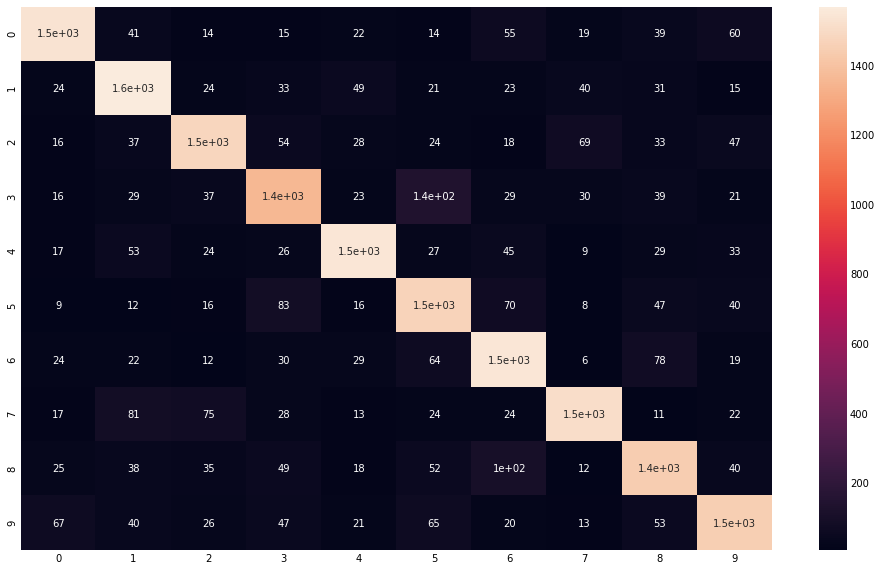

In [94]:
print('Confusion matrix')
plt.figure(figsize = (15, 10))
sns.heatmap(confusion_matrix(y_test_o, predictions), annot = True)

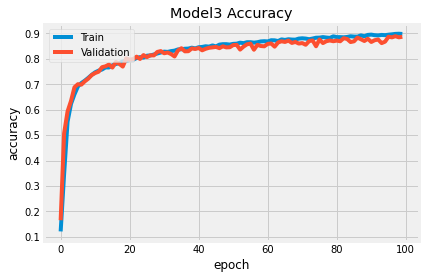

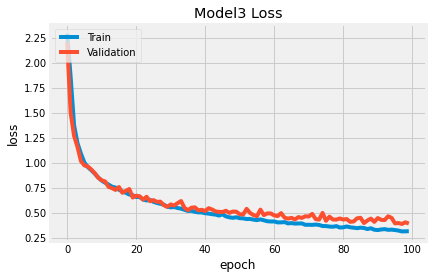

In [105]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model3 Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model3 Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.show()

In [97]:
model3.predict_classes(X_test)[5]

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


9

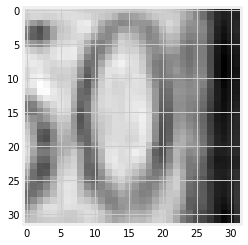

In [98]:
#Showing the image
plt.imshow(X_test[20].reshape(32, 32), cmap = 'gray')

In [99]:
model3.predict_classes(X_test)[20]

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


0

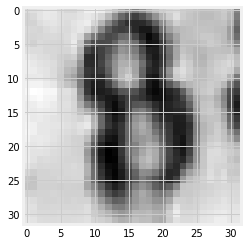

In [100]:
plt.imshow(X_test[10].reshape(32, 32), cmap = 'gray')

In [101]:
model3.predict_classes(X_test)[10]

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


6

# **Conclusion**

- Evaluated the accuracy using two methods i.e. baby sitting the NN and NN through API. 
- Followed all the required steps starting with loading the datasets to performing hyperparameter optimization and running a finer search by using a finer range. 
- Explored different options in optimizers, number of activators, learning rate and activation methods in NN through API. 
- Found that baby sitting process achieved the best accuracy of 21% using hyper parameter optimization. 
- It might have been further improved but that's the trade off vs time taken to run the script. 
- NN through API method achieved best accuracy of 90% on validation set. 
- Also printed the classification report, visualized the confusion matrix and summarized history for accuracy and loss.

In [106]:
!pip install nbconvert

In [107]:
!jupyter nbconvert --to html Saumya Kothari - Introduction to Neural Networks & Deep Learning Project [Part 4].ipynb

/bin/bash: Deep: command not found
This application is used to convert notebook files (*.ipynb) to various other
formats.


Options
-------

Arguments that take values are actually convenience aliases to full
Configurables, whose aliases are listed on the help line. For more information
on full configurables, see '--help-all'.

--execute
    Execute the notebook prior to export.
--allow-errors
    Continue notebook execution even if one of the cells throws an error and include the error message in the cell output (the default behaviour is to abort conversion). This flag is only relevant if '--execute' was specified, too.
--no-input
    Exclude input cells and output prompts from converted document. 
    This mode is ideal for generating code-free reports.
--stdout
    Write notebook output to stdout instead of files.
--stdin
    read a single notebook file from stdin. Write the resulting notebook with default basename 'notebook.*'
--inplace
    Run nbconvert in place, overwriting the e